<a href="https://colab.research.google.com/github/utsavdarlami/NepalLicensePlateRecognition/blob/master/PlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 !git clone https://github.com/thtrieu/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.


In [0]:
cd darkflow

/content/darkflow


In [0]:
ls


cfg/       demo.gif  labels.txt  preview.png  sample_img/  test/
darkflow/  flow*     LICENSE     README.md    setup.py


In [0]:
!python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [0]:
pip install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [0]:
pip install .

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=830395 sha256=e2d50608a49df37a9cc0040f45ab993cdf074ca8e907f295eb0e54945188cfe4
  Stored in directory: /tmp/pip-ephem-wheel-cache-hyy2nkom/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.


In [0]:
import os
drivelink = "../drive/My Drive/LicensePlate"
imagesDir = drivelink + "/NepalLicensePlateRecognition/Dataset/vehicle"
# os.listdir(drivelink)
os.listdir(imagesDir)

['6.jpg', '1.jpg', '5.jpg', '3.jpg', '2.jpg', '4.jpg']

In [0]:
from darkflow.net.build import TFNet
import cv2
import numpy as np
from  google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 
#import imread, imshow, subplots, show

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [0]:
options = {"pbLoad": drivelink+"/yolo-1c.pb", "metaLoad": drivelink+"/yolo-1c.meta", "gpu": 0.9}
plateDetector = TFNet(options)

NameError: ignored

# Start 

In [0]:

testImage = plt.imread(imagesDir +"/2.jpg")


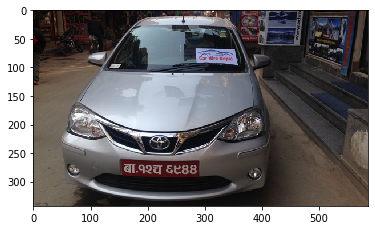

In [0]:
plt.imshow(testImage)

In [0]:
results = plateDetector.return_predict(testImage)
results

[{'bottomright': {'x': 295, 'y': 292},
  'confidence': 0.0,
  'label': 'plate',
  'topleft': {'x': 156, 'y': 260}},
 {'bottomright': {'x': 289, 'y': 296},
  'confidence': 0.0,
  'label': 'plate',
  'topleft': {'x': 160, 'y': 256}},
 {'bottomright': {'x': 299, 'y': 290},
  'confidence': 0.7408902,
  'label': 'plate',
  'topleft': {'x': 152, 'y': 261}}]

In [0]:
results.sort(key=lambda x: x['confidence'],reverse=True)
results

[{'bottomright': {'x': 299, 'y': 290},
  'confidence': 0.7408902,
  'label': 'plate',
  'topleft': {'x': 152, 'y': 261}},
 {'bottomright': {'x': 295, 'y': 292},
  'confidence': 0.0,
  'label': 'plate',
  'topleft': {'x': 156, 'y': 260}},
 {'bottomright': {'x': 289, 'y': 296},
  'confidence': 0.0,
  'label': 'plate',
  'topleft': {'x': 160, 'y': 256}}]

In [0]:
highCon = results[0]
highCon

{'bottomright': {'x': 299, 'y': 290},
 'confidence': 0.7408902,
 'label': 'plate',
 'topleft': {'x': 152, 'y': 261}}

In [0]:
bRight  = highCon["bottomright"]
tLeft = highCon["topleft"]


In [0]:
bRight

{'x': 299, 'y': 290}

In [0]:
tLeft

{'x': 152, 'y': 261}

In [0]:
# (xo,yo)
x0 = tLeft['x'] 
y0 = tLeft['y']

#(x4,y4)
xf = bRight['x']
yf = bRight['y']

widthI = xf-x0
heightI = yf - y0

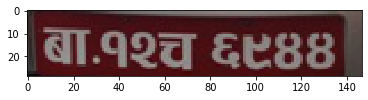

In [0]:
betaPlate = testImage[y0:yf,x0:xf]
plt.imshow(betaPlate)


array([11, 10,  8], dtype=uint8)

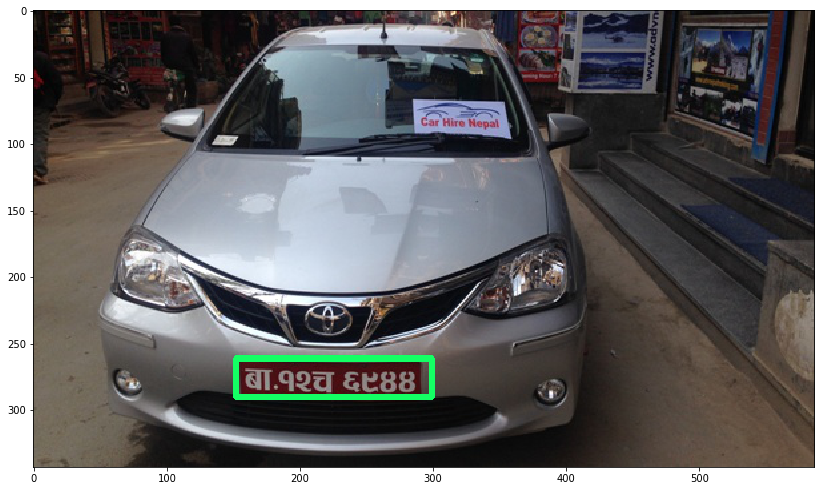

In [0]:
testImageCopy = testImage.copy()
cv2.rectangle(testImageCopy,(x0,y0),(xf,yf), (20, 255, 100) ,3)
# testImage[0][0]
plt.figure(figsize = (14,10))
plt.imshow(testImageCopy)

# get_plate Single 

In [0]:
# function that gets the plate from the vehicle 
def get_plate(p_image):
    prediction_array = plateDetector.return_predict(p_image)

    prediction_array.sort(key=lambda x: x.get('confidence'),reverse=True)
    high_confidence = prediction_array[0]
    bottomRight  = high_confidence["bottomright"]
    topLeft = high_confidence["topleft"]
    print(high_confidence['confidence'])
    x0 = topLeft['x'] 
    y0 = topLeft['y']

#(x4,y4)m
    xf = bottomRight['x']
    yf = bottomRight['y']

    return p_image[y0:yf,x0:xf]


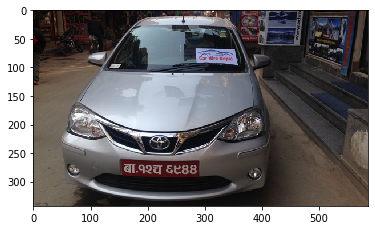

0.7408902


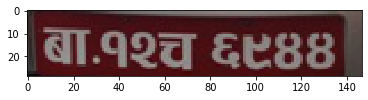

In [0]:
testImage2 = plt.imread(imagesDir +"/2.jpg")
plt.imshow(testImage2)
plt.show()
plateIs2 = get_plate(testImage2)
plt.imshow(plateIs2)


# More Images 


In [0]:
#More Images 
moreimagesDir = drivelink + "/001plate"
# os.listdir(drivelink)
# os.listdir(moreimagesDir)[-5:-1]
moreImageDir = os.listdir(imagesDir)
moreImageDir[:5]


['6.jpg', '1.jpg', '5.jpg', '3.jpg', '2.jpg']

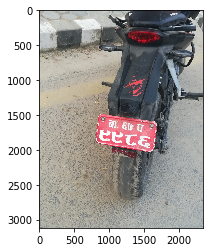

0.54190856


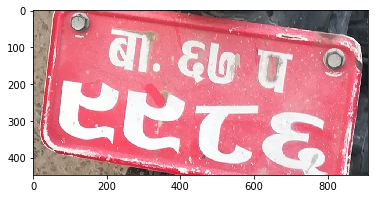

In [0]:
ti2 = plt.imread(moreimagesDir +"/21.jpg")
plt.imshow(ti2)
plt.show()
pt2 = get_plate(ti2)
plt.imshow(pt2)
